In [48]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
with open('/home/diya/Documents/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/meepo_10-10_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
       
with open('/home/diya/Documents/rat-fes/data/pickles/rat-t_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp) 


In [20]:
cc1 = CCAProcessor(cp1, cp2, metric_angle='forelimb', align=0)

should be good to align
(2110, 32)
(2110, 7)
(2110, 32)
(2110, 7)


In [11]:
cp1_h, cp1_vaf, _, _, = cp1.decode_angles()
print(cp1_vaf)

[0.15  0.397 0.074 0.427 0.34  0.107 0.347]


In [95]:
cp2_procx = cc1.data['cp2']['proc_x']
cp2_procy = cc1.data['cp2']['proc_y']

cp2_procx_format, cp2_procy_format = format_data(cp2_procx, cp2_procy)

In [132]:
cp2_ridge_transformer, cp2_ridge_h, cp2_ridge_vaf, predic, actual = cc1.new_apply_ridge(metric_angle='forelimb', decoder=cp1_h, my_alpha=100)

initial_scoring is : -0.02
new_scoring is: 0.4
test_set_score=-0.16
initial_scoring is : -0.02
new_scoring is: 0.41
test_set_score=-0.07
initial_scoring is : -0.02
new_scoring is: 0.4
test_set_score=-0.53
initial_scoring is : -0.02
new_scoring is: 0.4
test_set_score=-0.12
initial_scoring is : -0.02
new_scoring is: 0.4
test_set_score=-0.22
initial_scoring is : -0.02
new_scoring is: 0.39
test_set_score=-0.36
initial_scoring is : -0.02
new_scoring is: 0.39
test_set_score=-0.23
initial_scoring is : -0.01
new_scoring is: 0.4
test_set_score=-0.25
initial_scoring is : -0.02
new_scoring is: 0.41
test_set_score=-0.3
initial_scoring is : -0.01
new_scoring is: 0.41
test_set_score=-0.17


In [71]:
print(np.average(cp2_ridge_vaf))

-0.11499999999999999


0.04


/home/diya/anaconda3/envs/rat-fes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
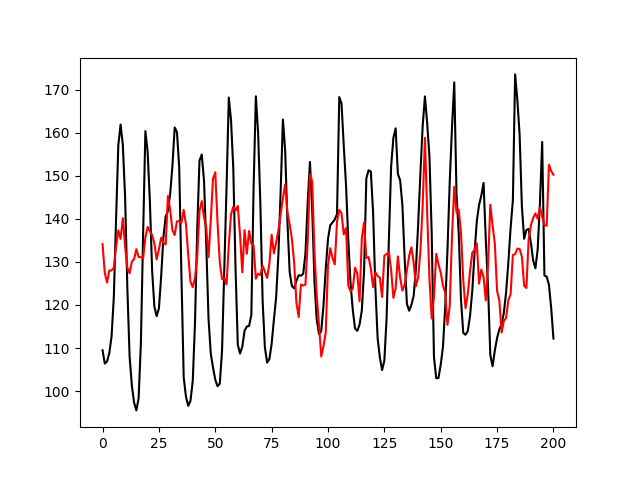

In [68]:
clf, pinv_vaf, pinv_predic, actual_predic = cc1.new_apply_pinv_transform(decoder=cp1_h)

test_set_score=-0.05
test_set_score=-0.18
test_set_score=-0.08
test_set_score=-0.66
test_set_score=0.16
test_set_score=-0.02
test_set_score=-0.14
test_set_score=-0.56
test_set_score=-0.08
test_set_score=-0.03


In [69]:
np.average(pinv_vaf)

-0.164

0.16


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
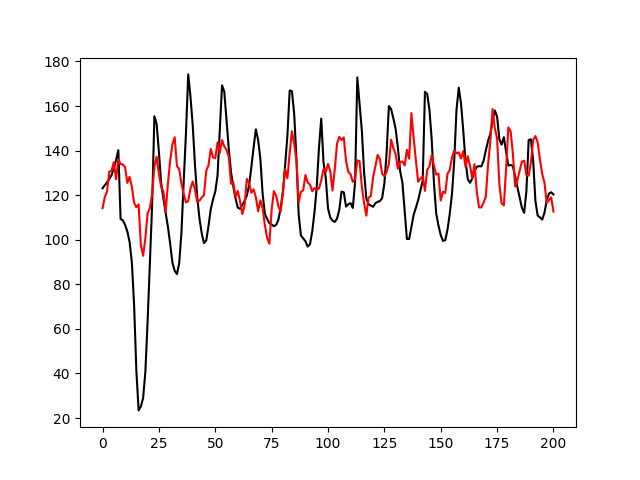

In [72]:
fig3, ax3 = plt.subplots()
ax3.plot(actual_predic[:,6], color='black')
ax3.plot(pinv_predic[:,6], color='red')
print(vaf(actual_predic[:,6], pinv_predic[:,6]))

In [85]:
cp1_predic_phase, cp1_actual_phase, cp1_sin, cp1_cos, cp1_phase_vaf =  cp1.decode_phase(metric_angle='forelimb')


In [89]:
cp1_proc_x = cc1.data['cp1']['proc_x']
cp1_proc_y = cc1.data['cp1']['proc_y']

In [92]:
_, _, cp1_proc_sin, cp1_proc_cos, _ =  cp1.decode_phase(rates=cp1_proc_x, angles=cp1_proc_y, metric_angle='forelimb')

In [117]:
_, cp2_actual_phase, cp2_proc_sin, cp2_proc_cos, _ =  cp2.decode_phase(rates=cp2_procx, angles=cp2_procy, metric_angle='forelimb')

In [125]:
_, cp2_actual_phase_format = format_data(cp2_procx, cp2_actual_phase)

In [86]:
cp1_h_sin = cp1.h_sin
cp1_h_cos = cp1.h_cos

In [104]:
sin_transformer, sin_h, cc1_sin_vaf, _, _ = cc1.new_apply_ridge(x1 = cp1_proc_x, y1 = cp1_proc_sin, x2=cp2_procx, y2=cp2_proc_sin, metric_angle='forelimb', decoder=cp1_h_sin) 
cos_transformer, cos_h, cc1_cos_vaf, _, _ = cc1.new_apply_ridge(x1 = cp1_proc_x, y1 = cp1_proc_cos, x2=cp2_procx, y2=cp2_proc_cos, metric_angle='forelimb', decoder=cp1_h_cos) 

initial_scoring is : -0.43
new_scoring is: 0.51
test_set_score=-0.2
initial_scoring is : -0.45
new_scoring is: 0.52
test_set_score=-0.01
initial_scoring is : -0.47
new_scoring is: 0.51
test_set_score=-0.76
initial_scoring is : -0.47
new_scoring is: 0.5
test_set_score=-0.23
initial_scoring is : -0.42
new_scoring is: 0.51
test_set_score=-0.2
initial_scoring is : -0.44
new_scoring is: 0.51
test_set_score=-0.38
initial_scoring is : -0.42
new_scoring is: 0.49
test_set_score=-0.22
initial_scoring is : -0.48
new_scoring is: 0.5
test_set_score=-0.44
initial_scoring is : -0.44
new_scoring is: 0.54
test_set_score=-0.34
initial_scoring is : -0.49
new_scoring is: 0.54
test_set_score=-0.25
initial_scoring is : -0.47
new_scoring is: 0.52
test_set_score=-0.04
initial_scoring is : -0.49
new_scoring is: 0.54
test_set_score=0.04
initial_scoring is : -0.52
new_scoring is: 0.52
test_set_score=-0.62
initial_scoring is : -0.52
new_scoring is: 0.53
test_set_score=-0.2
initial_scoring is : -0.47
new_scoring i

In [130]:
print((np.average(cc1_cos_vaf) + np.average(cc1_sin_vaf))/2)

-0.251


In [116]:
x_sin = cc1.quick_cca(cp1_proc_x, sin_transformer, scale=False)
x_cos = cc1.quick_cca(cp1_proc_x, cos_transformer, scale=False)

x_sin_format, _ = format_data(x_sin, cp2_procy)
x_cos_format, _ = format_data(x_cos, cp2_procy)

predic_sin = test_wiener_filter(x_sin_format, sin_h)
predic_cos = test_wiener_filter(x_cos_format, cos_h)

predic_phase = arctan_fn(predic_sin, predic_cos)



In [120]:
predic_phase.shape

(2100, 7)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
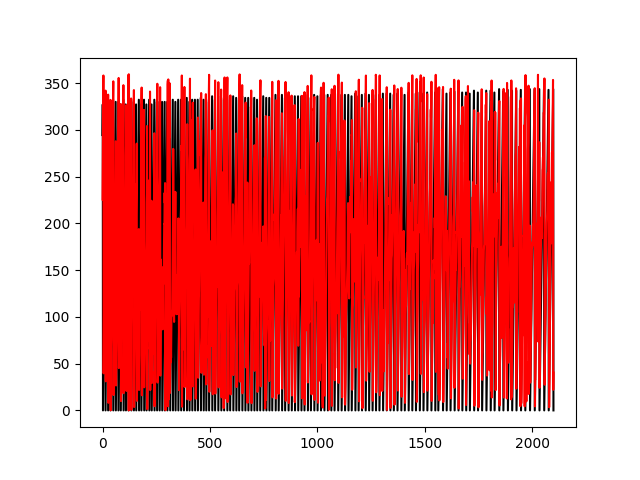

In [129]:
fig4, ax4 = plt.subplots()
ax4.plot(cp2_actual_phase_format[:,6], color='black')
ax4.plot(predic_phase[:,6], color='red')

In [128]:
cc2 = CCAProcessor(cp3, cp2, metric_angle='forelimb', align=0)

should be good to align
(1079, 32)
(1079, 7)
(1079, 32)
(1079, 7)


In [75]:
cp3_h, cp3_vaf, _, _, = cp3.decode_angles()
print(cp3_vaf )

[0.117 0.441 0.229 0.449 0.346 0.275 0.319]


In [79]:
_, cc2_best_h, cp3_ridge_vaf, cp3_ridge_predic, cp3_ridge_actual = cc1.new_apply_ridge(metric_angle='forelimb', decoder=cp1_h, my_alpha=100)

initial_scoring is : -0.16
new_scoring is: 0.33
test_set_score=-0.19
initial_scoring is : -0.15
new_scoring is: 0.33
test_set_score=0.04
initial_scoring is : -0.18
new_scoring is: 0.31
test_set_score=-0.22
initial_scoring is : -0.15
new_scoring is: 0.32
test_set_score=-0.13
initial_scoring is : -0.14
new_scoring is: 0.31
test_set_score=-0.02
initial_scoring is : -0.14
new_scoring is: 0.32
test_set_score=-0.22
initial_scoring is : -0.13
new_scoring is: 0.31
test_set_score=-0.17
initial_scoring is : -0.16
new_scoring is: 0.3
test_set_score=-0.03
initial_scoring is : -0.16
new_scoring is: 0.31
test_set_score=-0.03
initial_scoring is : -0.15
new_scoring is: 0.34
test_set_score=-0.18


-0.11499999999999999
0.04


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
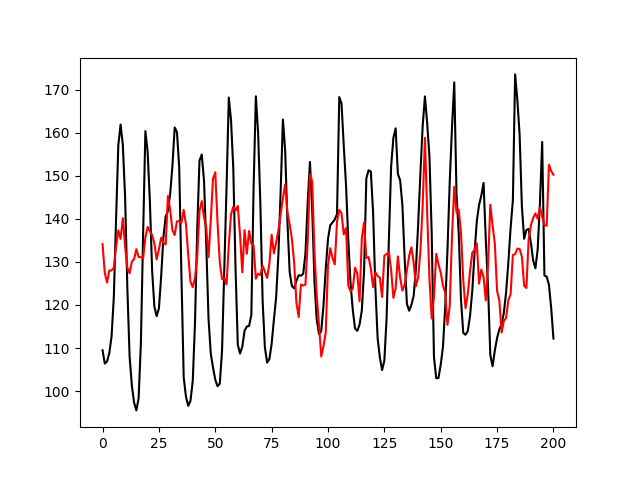

In [84]:
print(np.average(cp3_ridge_vaf))
fig3, ax3 = plt.subplots()
ax3.plot(cp3_ridge_actual[:,6], color='black')
ax3.plot(cp3_ridge_predic[:,6]+30, color='red')

print(vaf(cp3_ridge_actual[:,6], cp3_ridge_predic[:,6]))

0.41


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
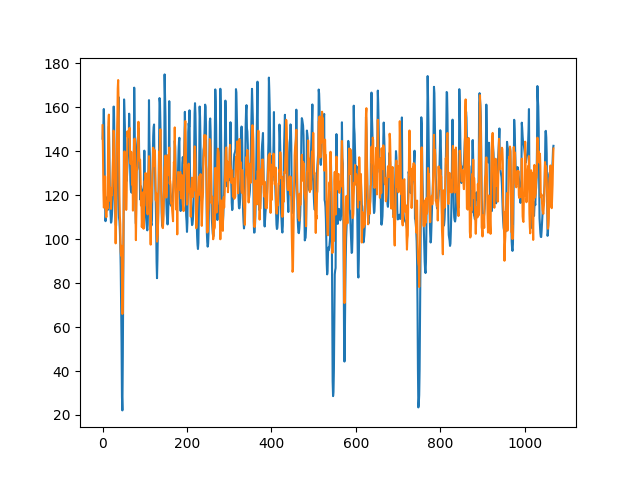

In [43]:
fig, ax = plt.subplots()
ax.plot(cp2_pprocy_format[:,6])
ax.plot(ypost[:,6]-20)
print(vaf(cp2_pprocy_format[:,6], ypost[:,6]))

In [44]:
clf, pinv_predic = cc2.apply_pinv_transform(x=cp2_pprocx, y=cp2_pprocy)

0.41


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
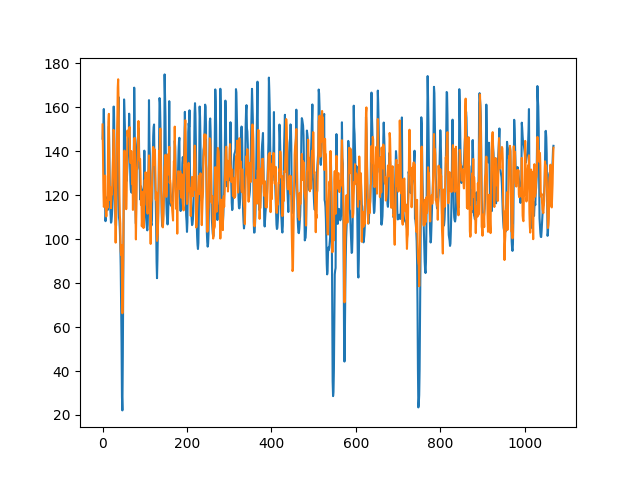

In [45]:
fig, ax = plt.subplots()
ax.plot(cp2_pprocy_format[:,6])
ax.plot(pinv_predic[:,6])
print(vaf(cp2_pprocy_format[:,6], pinv_predic[:,6]))

0.36


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
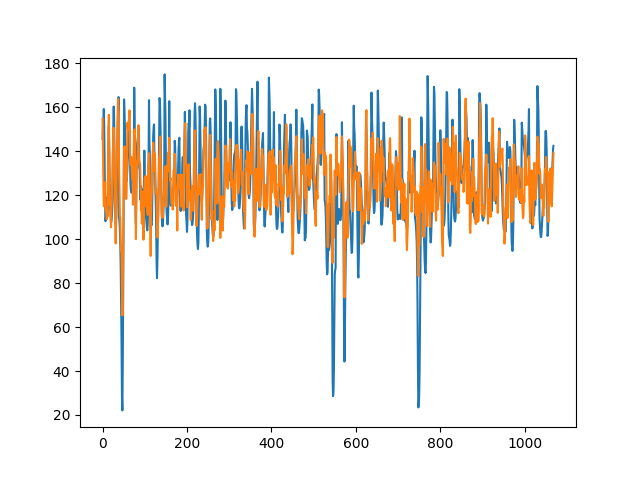

In [51]:
h_diya, _, _, _ = cp2.decode_angles(X=[cp2_pprocx], Y=[cp2_pprocy])
diya_predic = test_wiener_filter(cp2_pprocx_format, h_diya)
fig, ax = plt.subplots()
ax.plot(cp2_pprocy_format[:,6])
ax.plot(diya_predic[:,6])
print(vaf(cp2_pprocy_format[:,6], diya_predic[:,6]))